In [1]:
import spacedecomp
from spacedecomp import Factorization
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

In [2]:
x_train, y_train = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=97)


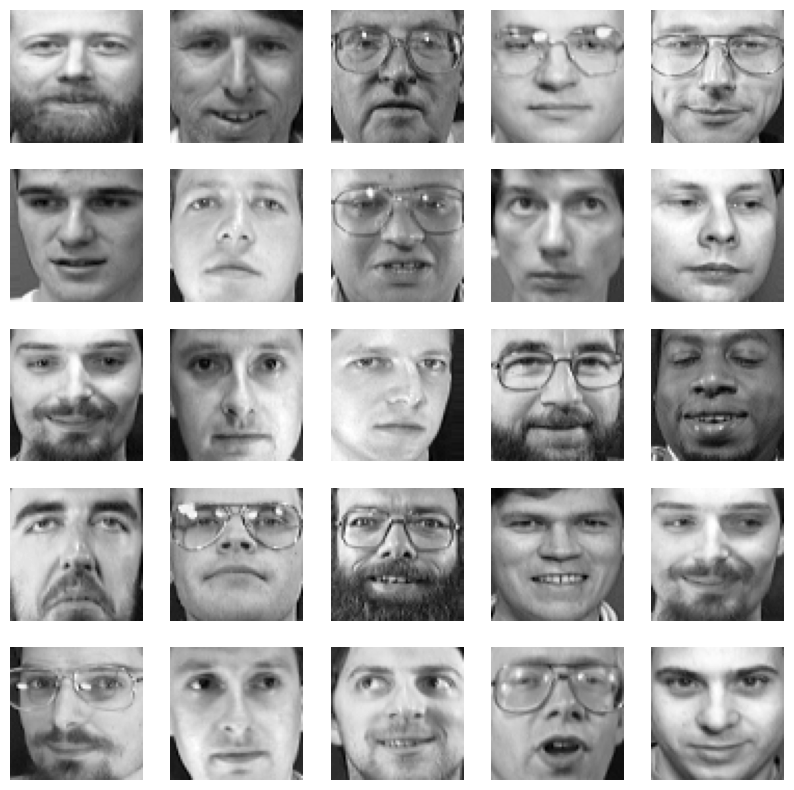

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

In [4]:
y_train.max() #number of people in total

39

In [5]:
Y = (x_train)*255
Y = Y.astype(int)

In [6]:
model = Factorization(Y, laten_dim=20, train_loadings=True, type='PNMF')

In [7]:
history = model.train(torch.tensor(Y), lr=1e-2, epochs=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]

Finished training


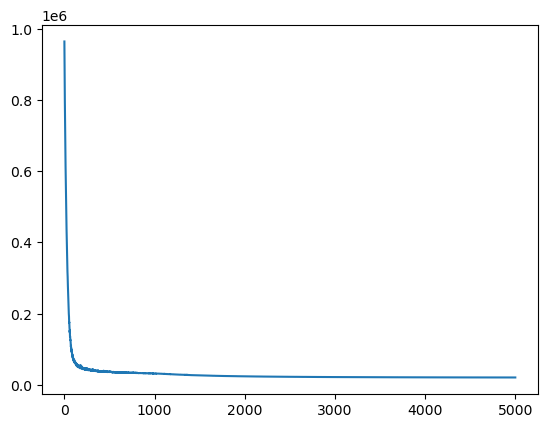

In [8]:
plt.plot(history)

### Visualize Factors

In [27]:
F = model.q_f.sample().numpy()

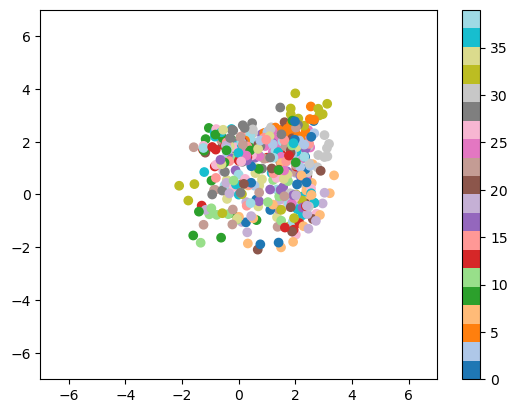

In [28]:
plt.scatter(F[:, 0], F[:, 1], c=y_train, cmap='tab20')
plt.ylim([-7, 7])
plt.xlim([-7, 7])
plt.colorbar()

### Visualize Loadings

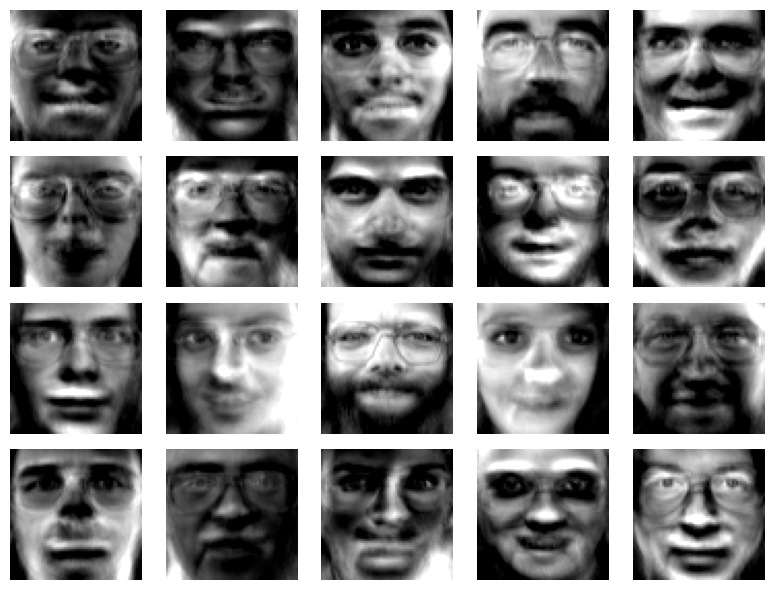

In [24]:
plt.figure(figsize=(8, 6), tight_layout=True)
for i in range(model.L):
    plt.subplot(4, 5, i+1)
    loading = torch.abs(model.W[:, i]).detach().cpu().numpy()
    loading = loading.reshape(64, 64)
    max_val = loading.max()
    loading = loading/max_val
    plt.imshow(loading, vmin=0, vmax=0.8, cmap='gray')
    plt.axis('off')

In [12]:
means = model.predict_mean().type(torch.int).detach().numpy()

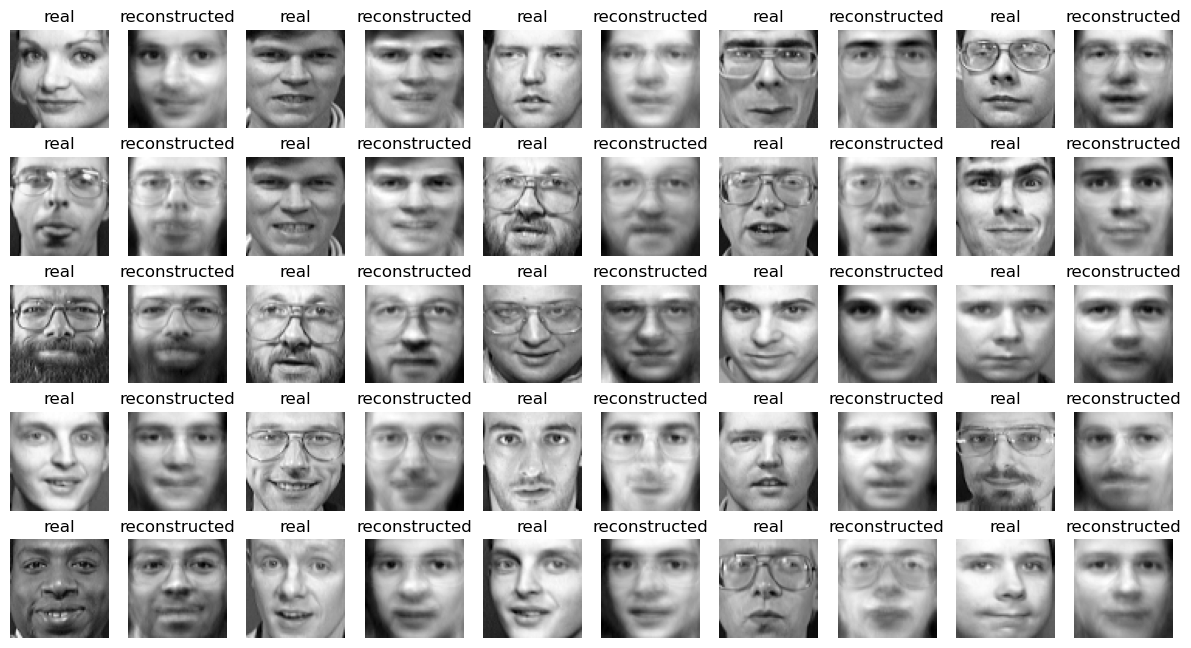

In [17]:
plt.figure(figsize=(15, 8))
for i in range(25):
    plt.subplot(5,10,(2*i)+1)
    plt.title('real')
    plt.imshow(x_train[i+25].reshape(64, 64), cmap='gray')
    plt.axis('off')

    plt.subplot(5,10,(2*i)+2)
    plt.title('reconstructed')
    plt.imshow(means[i+25].reshape(64, 64), cmap='gray')
    plt.axis('off')

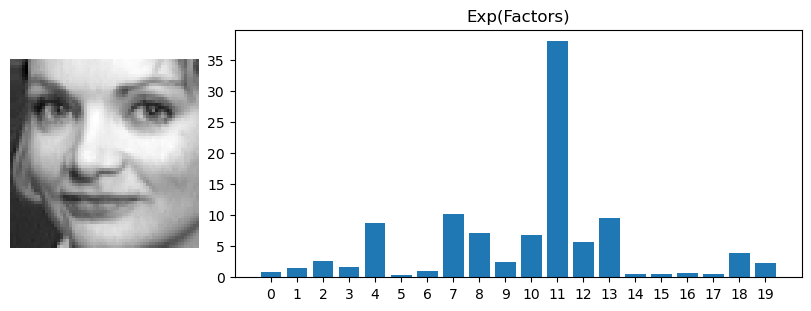

In [79]:
k = 25
x = np.arange(0, 20)

fig = plt.figure(figsize=(8, 3), layout="constrained")
spec = fig.add_gridspec(1, 4)

ax0 = fig.add_subplot(spec[0, 0])
ax0.matshow(x_train[k].reshape(64, 64), cmap='gray')
ax0.axis('off')

ax1 = fig.add_subplot(spec[0, 1:])
plt.title('Exp(Factors)')
ax1.bar(x, np.exp(F[k]))
ax1.set_xticks(x);

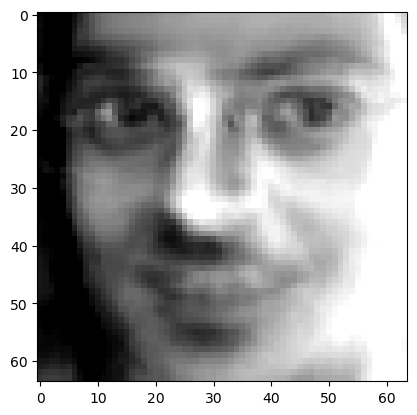

In [80]:
loading = torch.abs(model.W[:, 11]).detach().cpu().numpy()
loading = loading.reshape(64, 64)
max_val = loading.max()
loading = loading/max_val
plt.imshow(loading, vmin=0, vmax=0.8, cmap='gray')
plt.imshow(loading, vmin=0, vmax=0.8, cmap='gray')